In [9]:
import numpy as np
import umap
import matplotlib.pyplot as plt

In [10]:
embeddings = np.load('embeddings_resnet50.npy')
labels = np.load('labels_resnet50.npy')

In [3]:
# Reduce dimensions with UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings)

/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


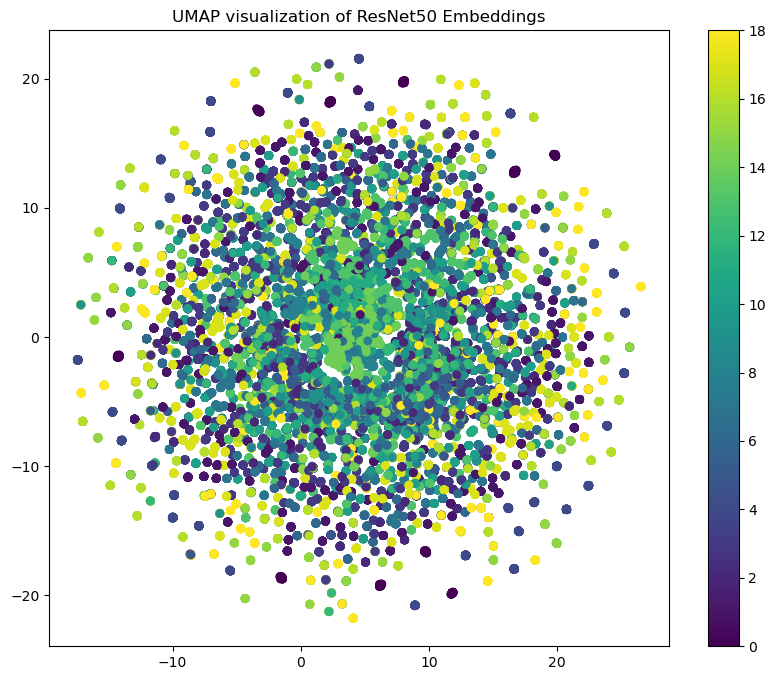

In [4]:
# Plot UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP visualization of ResNet50 Embeddings")
plt.show()

In [3]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

print(np.mean(embeddings_scaled, axis=0)[:5])  # Should be near 0
print(np.std(embeddings_scaled, axis=0)[:5])   # Should be near 1

[-1.39490774e-08 -1.39055434e-08 -1.30761268e-09  2.36127597e-08
  1.57820477e-08]
[1.0000032  0.99999815 0.99999964 1.000008   0.99999535]


/root/anaconda3/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/root/anaconda3/lib/python3.12/site-packages/umap/spectral.py:548: UserWarning: Spectral initialisation failed! The eigenvector solver
failed. This is likely due to too small an eigengap. Consider
adding some noise or jitter to your data.

Falling back to random initialisation!
  warn(


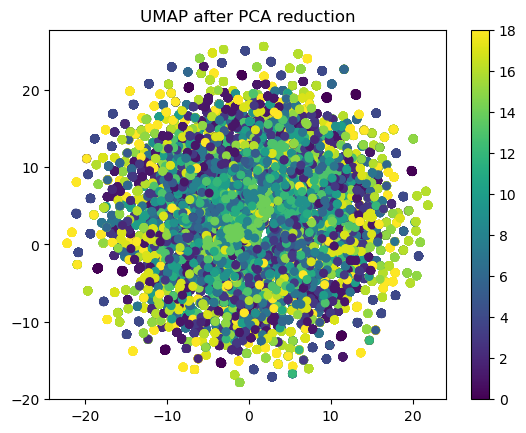

In [5]:
from sklearn.decomposition import PCA

# First reduce dimensions using PCA
pca = PCA(n_components=50)
embeddings_pca = pca.fit_transform(embeddings)

# Then apply UMAP
umap_model = umap.UMAP(n_components=2, random_state=42)
embeddings_umap = umap_model.fit_transform(embeddings_pca)

# Visualize with UMAP
plt.scatter(embeddings_umap[:, 0], embeddings_umap[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar()
plt.title("UMAP after PCA reduction")
plt.show()

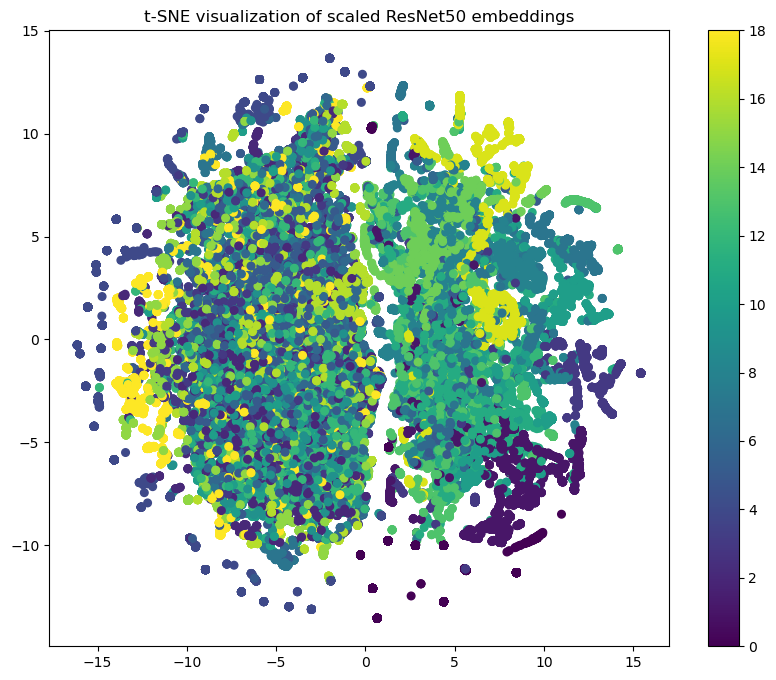

In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# First, standardize embeddings
scaler = StandardScaler()
embeddings_scaled = scaler.fit_transform(embeddings)

# Apply t-SNE after scaling
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
embeddings_tsne = tsne.fit_transform(embeddings_scaled)

# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='viridis', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled ResNet50 embeddings")
plt.show()

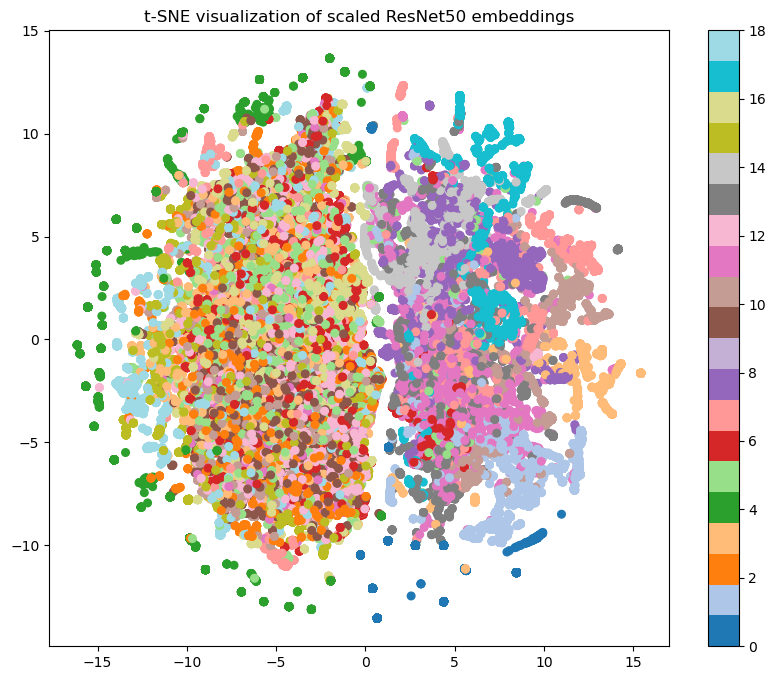

In [12]:
# Visualize the t-SNE results
plt.figure(figsize=(10, 8))
scatter = plt.scatter(embeddings_tsne[:, 0], embeddings_tsne[:, 1], c=labels, cmap='tab20', s=30)
plt.colorbar(scatter)
plt.title("t-SNE visualization of scaled ResNet50 embeddings")
plt.show()

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train a k-NN classifier on the embeddings
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(embeddings_scaled, labels)

# Evaluate accuracy
predictions = knn.predict(embeddings_scaled)
accuracy = accuracy_score(labels, predictions)
print(f"k-NN accuracy: {accuracy * 100:.2f}%")

k-NN accuracy: 93.67%


In [14]:
from sklearn.metrics import classification_report
report = classification_report(labels, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3509
           1       0.97      1.00      0.98      3428
           2       0.86      0.97      0.91      3513
           3       0.95      0.97      0.96      3419
           4       1.00      1.00      1.00      3376
           5       0.81      0.65      0.72      3384
           6       0.89      0.99      0.94      3560
           7       0.97      0.97      0.97      3476
           8       0.97      0.96      0.97      3479
           9       0.83      0.85      0.84      3508
          10       0.91      0.95      0.93      3476
          11       0.97      0.73      0.84      3499
          12       0.91      0.78      0.84      3386
          13       0.97      0.98      0.97      3408
          14       0.96      1.00      0.98      3411
          15       0.95      1.00      0.97      3464
          16       0.95      1.00      0.97      3476
          17       0.97    

In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

# Apply k-means clustering
kmeans = KMeans(n_clusters=len(set(labels)), random_state=42)
cluster_labels = kmeans.fit_predict(embeddings_scaled)

# Evaluate using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(labels, cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.4f}")

# Evaluate clustering with silhouette score
sil_score = silhouette_score(embeddings_scaled, cluster_labels)
print(f"Silhouette Score: {sil_score:.4f}")

Adjusted Rand Index (ARI): 0.1823
Silhouette Score: 0.0516
